# Introduction to Data Science
## Homework 5

Student Name: Chutang Luo

Student Netid: cl5293

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

If we don't use Laplace smoothing, if a feature $e_i$ in the testing data is not in the training data, count($e_i,c$)=0. When calculating the the probability of a certain class occuring given a set of features, we need to multiply the probabilities, here  P($e_i$ | $c$)=0 would be introduced and we have P($c$ | E) as final result, which leads to a failure in preserving the information contributed by the non-zero probabilities and may lead to a wrong answer. Thus, a small weight is needed so that we could take the feature $e_i$ into account, which is Laplace smoothing. The variance could be high if we don't use Laplace smoothing, because the original method of calculation only fits the certain training data better. If we use a very different training dataset or testing dataset, the probability of unknown words would be zero and this will results in a wrong probablity of the classification, which is not accurate and may increase both variance and bias. Using Laplace smoothing could solve the problem of unknown features, which leads to lower variance and maybe lower bias. For example, the testing data is "a very close basketball game" and the word "close" is not included in the training data. The testing data indeed should be in the "sports" category. However, if we do not use Laplace smoothing, given the class sports, the probablity of "close" in this class is 0; when we calculate the probability of "sports" occuring given this sentence, we would gain a zero answer: the sentence does not belong to the "sports" category, which does not match the real situation. Using Laplace smoothing can avoid this problem and therefore leads to a more accurate calculation.

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [4]:
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('imdb.csv')
df

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N
...,...,...
8495,'Alright friends a serious movie buff is expec...,N
8496,'I found this film embarrassing to watch. I fe...,N
8497,'To put it simply I am not fond of westerns. A...,N
8498,'Some of these viewer comments are just ridicu...,N


2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [6]:
df.loc[df['Class'] =='P','Class']=1
df.loc[df['Class'] =='N','Class']=0

3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [7]:
from sklearn.model_selection import train_test_split
X=df['Text']
Y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.75)

4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vector = CountVectorizer(binary=True,ngram_range=(1,2),stop_words='english')
count_vector=count_vector.fit(X_train)
X_train_count = count_vector.transform(X_train)
X_test_count = count_vector.transform(X_test)

tf_idf = TfidfVectorizer(binary=True,ngram_range=(1,2),stop_words='english')
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf = tf_idf.transform(X_test)

y_train=y_train.values.astype('int')
y_test=y_test.values.astype('int')

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [147]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

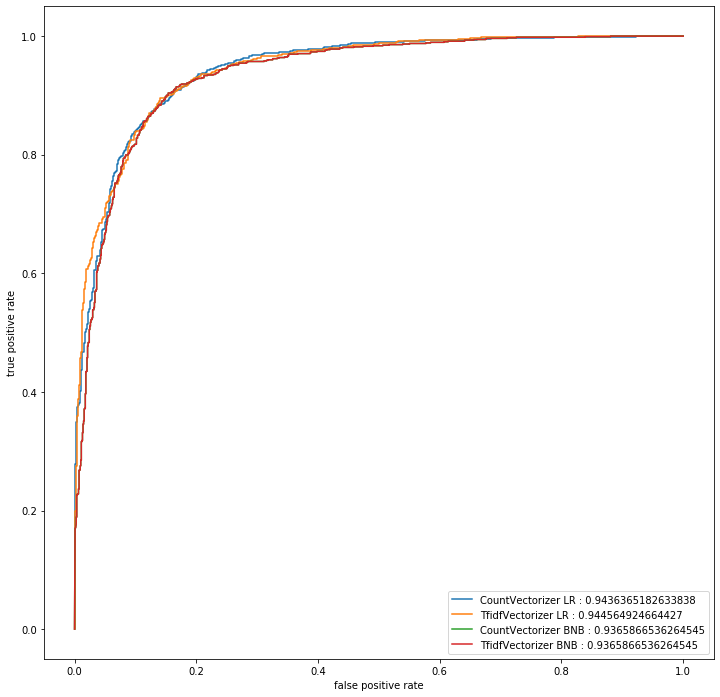

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics


# use LogisticRegression to predict data processed by CountVectorizer
lr_count=LogisticRegression()
lr_count.fit(X_train_count,y_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test,lr_count.predict_proba(X_test_count)[:,1])

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.plot(fpr, tpr, label = 'CountVectorizer LR : ' + str(metrics.auc(fpr, tpr)))


# use LogisticRegression to predict data processed by TfidfVectorizer
lr_tfidf=LogisticRegression()
lr_tfidf=lr_tfidf.fit(X_train_tfidf, y_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test,lr_tfidf.predict_proba(X_test_tfidf)[:,1])
plt.plot(fpr, tpr, label = 'TfidfVectorizer LR : ' + str(metrics.auc(fpr, tpr)))

# use BernoulliNB to predict data processed by CountVectorizer
bnb_count=BernoulliNB()
bnb_count=bnb_count.fit(X_train_count, y_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test,bnb_count.predict_proba(X_test_count)[:,1])
plt.plot(fpr, tpr, label = 'CountVectorizer BNB : ' + str(metrics.auc(fpr, tpr)))

# use BernoulliNB to predict data processed by TfidfVectorizer
bnb_tfidf=BernoulliNB()
bnb_tfidf=bnb_tfidf.fit(X_train_tfidf, y_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test,bnb_tfidf.predict_proba(X_test_tfidf)[:,1])
plt.plot(fpr, tpr, label = 'TfidfVectorizer BNB : ' + str(metrics.auc(fpr, tpr)))

plt.legend()
plt.show()


From the graph above and the AUC score, we can see that the LogisticRegression model performs better than BernoulliNB model in both the CountVectorizer and TfidfVectorizer. BernoulliNB has a naive assumption of conditional independence for every feature. However, in real life, real data sets are never perfectly independent. In this case, the assumptions of BernoulliNB can not be well satisfied, so the Logistics model performs better. Naive Bayes has a higher bias but lower variance compared to logistic regression. If the data set does not follows the bias, then BernoulliNB could not be a better classifier. 

The option of CountVectorizer, BernoulliNB and the option of TfidfVectorizer, BernoulliNB perform identically. This is because BernoulliNB is designed for binary/boolean features. In CountVectorizer(), we set binary=True, which all non zero counts are set to 1. In the data tranformed by CountVectorizer(), every element is either 0 or 1, so the data is binary. In TfidfVectorizer(), binary=True only set the tf term binary, and the idf term is still continous, so the data transformed by TfidfVectorizer() is still continous. However, as BernoulliNB can only handle binary features, so the continuity of the data would be of no use in the model. For the data transformed by TfidfVectorizer(), BernoulliNB treats the data as binary, that is to set the non-zero data as 1, and zero remains zero; in this case, the training data would be just the same as the data transformed by CountVectorizer(). Therefore, though we use different methods to transform the data, due to the property of BernoulliNB, it still generates the same results for different training data.

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples were labeled positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [227]:
diff=lr_tfidf.predict(X_test_tfidf) != y_test 
index_diff=np.where(diff==True) #index of prediction that does not matches the test data
i=0
pos_index=y_test[index_diff]==1
diff_pos=np.where(pos_index==1)
index_diff_pos=index_diff[0][diff_pos] #finding the index of examples were labeled positive, but were incorrectly classified as negative.

for i in range(5):
    print(X_test.values[index_diff_pos[i]])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
'Didnt Mystic Pizza win the Oscar for that year? This movie never had a chance due to the casting but perhaps by now people can see why I felt that way upon leaving the theater. Only Wargames left me feeling similarly disturbed after leaving the theater with the feeling I was getting a glimpse of our future. History has shown that this is exactly what happened. The casting is a pop-culture Cuisinart of the 1980s: you get Arnold as Ben Richard

Review 1: Indeed this is a positive review, because the writer said "an absolute must-see" at the end. When describing the plot of the film, the writer uses a series of negative words such as gotten-worse, dumbed-down,downright chilling and so on. Considering the use of these negative words, the review was wrongly classified as a negative ones.

Review 2: The writer the characters and story settings are excellent, but then the writer use words like distract, annoy, upset to describe the plot, which leads to a wrong classification of the review.

Review 3: The writer would like to rate this movie 10, so this is a positive review. However, the writer uses words like scary, ruin, which may lead to a wrong classification of the review.

Review 4: The writer says  wouldn't go so far as to not recommend this movie, so this is a positive review. However, negative words like problems, bad, disappointed, dull in the description for the plot, so the review has been wrongly classified.

Review 5: The writer says  it was impossible not to enjoy her performance, so this is a positive review. However, some negative words are used for the description of the story, such as bad, mess, madness, horror, so the review was wrongly classified.